# Exercise 05

## Logistic regression exercise with Titanic data




We'll be working with a dataset from Kaggle's Titanic competition: [data](https://github.com/justmarkham/DAT8/blob/master/data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)

**Goal**: Predict survival based on passenger characteristics

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


Read the data into Pandas

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [2]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

# Exercise 5.1 

Split the data into training and testing sets

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 5.2

Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
print(feature_cols, logreg.coef_[0])

['Pclass', 'Parch'] [-0.88188861  0.34239216]


# Exercise 5.3

Make predictions on the testing set and calculate the accuracy

In [7]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [8]:
# calculate classification accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.668161434978


# Exercise 5.4

Confusion matrix of Titanic predictions

In [11]:
# print confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


In [12]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [13]:
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

True Positives: 44
True Negatives: 105
False Positives: 23
False Negatives: 51


In [14]:
# calculate the sensitivity
print(TP / float(TP + FN))
print(44 / float(44 + 51))

0.463157894737
0.4631578947368421


In [15]:
# calculate the specificity
print(TN / float(TN + FP))
print(105 / float(105 + 23))

0.8203125
0.8203125


# Exercise 5.5

Increase sensitivity by lowering the threshold for predicting survival

Create a new classifier by changing the probability threshold to 0.3

What is the new confusion matrix?

In [16]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

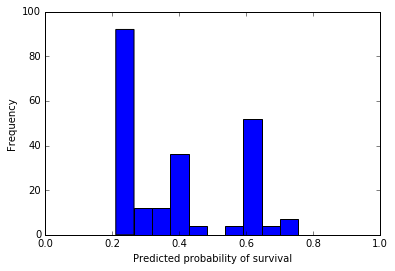

In [17]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [18]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [19]:
# old confusion matrix
print(confusion)

[[105  23]
 [ 51  44]]


In [20]:
# new confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[72 56]
 [32 63]]


In [21]:
# new sensitivity (higher than before)
print(63 / float(63 + 32))

0.6631578947368421


In [22]:
# new specificity (lower than before)
print(72 / float(72 + 56))

0.5625
